# CS 5324 Lab 5: Wide and Deep Networks

## Team

The team consists of three members:
1. Melodie Zhu
2. Samina Faheem
3. Giancarlos Dominguez

## Dataset Preparations

In [13]:
import os
import pandas as pd
import numpy as np
import copy

In [14]:
data_directory = os.getcwd() + '\\data\\heart.csv'
df = pd.read_csv(data_directory)

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
print("Shape of the dataset", df.shape)

print(f"\nNumber of observations in the dataset: {df.shape[0]}")
print(f"Number of features in the dataset: {df.shape[1]}")

Shape of the dataset (918, 12)

Number of observations in the dataset: 918
Number of features in the dataset: 12


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


The metadata about the dataset:
<br />
<br />
Number of attributes: 12
<br />
<br />
Feature information: A DataFrame with 918 rows and 14 variables:

1. age: age of the patient in years
<br />
2. sex: sex of the patient
    - M: indicates Male
    - F: indicates Female
<br />
3. cp: chest pain type
    - TA: Typical Angina
    - ATA: Atypical Angina
    - NAP: Non-Anginal Pain
    - ASY: Asymptomatic
<br />    
4. RestingBP: resting blood pressure mmHg
<br />
5. Cholesterol: serum cholesterol mm/dl
<br />
6. FastingBS: fasting blood sugar
    - 1: if FastingBS > 120 mg/dl
    - 0: otherwise
<br />
7. RestingECG: resting electrocardiogram results 
    - Normal: Normal
    - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
<br />
8. MaxHR: maximum heart rate achieved Numeric value between 60 and 202
<br />
9. ExerciseAngina: exercise-induced angina 
    - Y: indicates Yes 
    - N: indicates No
<br />
10. Oldpeak: oldpeak = ST Numeric value measured in depression
<br />
11. ST_Slope: the slope of the peak exercise ST segment
    - Up: upsloping
    - Flat: flat
    - Down: downsloping
<br />
12. HeartDisease: output class 
    - 1: heart disease
    - 0: Normal
<br />
Reference of the dataset [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction]
​
**Catagorical Values : Sex , ChestPainType , RestingECG, ExerciseAngina , ST_Slope**
​
**Numeric features are: Age, RestingBP, Cholesterol, MaxHR**

In [18]:
df_imputed = copy.deepcopy(df)

In [19]:
# let's just get rid of rows with any missing data
# and then reset the indices of the dataframe so it corresponds to row number
df_imputed.replace(to_replace=' ?',value=np.nan, inplace=True)
df_imputed.dropna(inplace=True)
df_imputed.reset_index()

df_imputed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ========================================================
# define objects that can encode each variable as integer    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

# train all encoders (special case the target 'income')
for col in categorical_headers:
    df_imputed[col] = df_imputed[col].str.strip()
    # integer encode strings that are features
    encoders[col] = LabelEncoder() # save the encoder
    df_imputed[col+'_int'] = encoders[col].fit_transform(df_imputed[col])

# ========================================================
# scale the numeric, continuous variables
numeric_headers = ["Age", "RestingBP", "Cholesterol","MaxHR"]

for col in numeric_headers:
    df_imputed[col] = df_imputed[col].astype(float)
    
    ss = StandardScaler()
    df_imputed[col] = ss.fit_transform(df_imputed[col].values.reshape(-1, 1))
include_header =["FastingBS","Oldpeak"]
df_imputed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_int,ChestPainType_int,RestingECG_int,ExerciseAngina_int,ST_Slope_int
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,0.0,Up,0,1,1,1,0,2
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,1.0,Flat,1,0,2,1,0,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,0.0,Up,0,1,1,2,0,2
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,1.5,Flat,1,0,0,1,1,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,0.0,Up,0,1,2,1,0,2


In [21]:
# let's start with without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just use all inputs as-is 
#this is just to get an example running in Keras (its not a good idea)

feature_columns = categorical_headers_ints+numeric_headers+include_header

print(feature_columns)

['Sex_int', 'ChestPainType_int', 'RestingECG_int', 'ExerciseAngina_int', 'ST_Slope_int', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak']


In [24]:
import tensorflow as tf 

from tensorflow import keras
keras.__version__

from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [25]:
# we want to predict the X and y data as follows:
X = df_imputed[feature_columns].to_numpy()
y = df_imputed['HeartDisease'].values # get the labels we want
    # get rid of the class label
    # X and y are now numpy matrices, by calling 'values' on the pandas data frames we 
    # have converted them into simple matrices to use with scikit learn
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits

num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedKFold(n_splits=num_cv_iterations)
                         
print(cv_object)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [26]:
# run logistic regression and vary some parameters
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
#lr_clf = HessianBinaryLogisticRegression(eta=0.1,iterations=10) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]


In [27]:
# get some of the specifics of the dataset
n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 918
n_features: 11
n_classes: 2


Number of instances in each class:[410 508]


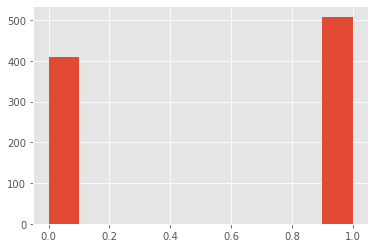

In [28]:
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('ggplot')


#=== Fill in code below========
print('Number of instances in each class:'+str(np.bincount(y)))
# you might be interested in the functions:
#     np.bincount
#     plt.hist
plt.hist(y)
plt.show()

(0.8135294117647058, 0.9607843137254902)

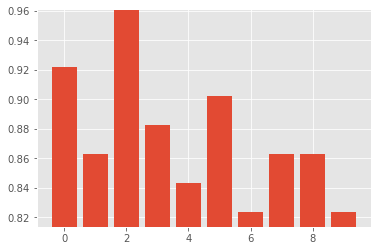

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
clf.fit(X,y)
#select cross validation
cv = StratifiedShuffleSplit(n_splits=10) #made kfold stratified
# select evaluation criteria
my_scorer = make_scorer(recall_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
#print(per_fold_eval_criteria.mean()*100)


# We have 508 values as 'HeartDisease' i.e. 1. From, above bar chart, we can see that few of the bars are 86% i.e. 1 denoting HeartDisease. So, some of folds have perfect recall. lowest here is 0.80, its 80% recall.
# 
# We do not have severe class imbalance in our data set. We need to stratify accross all the folds that we use and make sure classes are stratified in each fold. In order to properly seperate training and testing sets a stratified KFold should be used. Stratified KFold will ensure that each fold is representative of the overall data set. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
# 
# - Reference : [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)


In [30]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

print(f"We will use the following {len(feature_columns)} features:")
pp.pprint(feature_columns)


# Identifying the groups of features in the data that should be combined into cross-product features:
# 
# - For this dataset, the categorical features are `Sex , ChestPainType , RestingECG, ExerciseAngina , ST_Slope`
# 
# - The cross-product operation on the categorical features can be interpreted as logical conjunctions. The significance of the cross-product features is creating the combined features which are more useful to the prediction/classification tasks compared with the independent features .
# 
# - ..................

We will use the following 11 features:
[   'Sex_int',
    'ChestPainType_int',
    'RestingECG_int',
    'ExerciseAngina_int',
    'ST_Slope_int',
    'Age',
    'RestingBP',
    'Cholesterol',
    'MaxHR',
    'FastingBS',
    'Oldpeak']


## Modeling

In [31]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Recall

In [32]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)
print(keras.__version__)



2.12.0
2.12.0


In [33]:

# Now let's define the architecture for a multi-layer network

# First, lets setup the input size
num_features = X_train.shape[1]
input_tensor = Input(shape=(num_features,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(input_tensor)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=predictions)


In [34]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[Recall()])

model.summary()
model.fit(X_train, y_train, epochs=12, verbose=1)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
26/26 [==============================] - 0s 2ms/step - loss: 0.2499 - recall: 0.3450
Epoch 2/12
26/26 [==============================] - 0s 1ms/step - loss: 0.2437 - recall: 0.4279
Epo

In [36]:
import graphviz
from tensorflow.keras.utils import plot_model


In [37]:
plot_model( model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

3/3 [==============================] - 0s 0s/step
[[39  2]
 [20 30]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78        41
           1       0.94      0.60      0.73        50

    accuracy                           0.76        91
   macro avg       0.80      0.78      0.76        91
weighted avg       0.81      0.76      0.75        91



## Graduate Analysis